In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

## Задание 1. 
### Сгенерировать арифметическую прогрессию a0=1,  d= 10, N =5.

In [4]:
class ArithmeticProgressionV1: 
    def __init__(self, a0, d, n): 
        self.a0 = a0 - d
        self.d = d
        self.i = 0
        self.n = n
        
    def __iter__(self): 
        return self
    
    def __next__(self): 
        if self.i < self.n: 
            self.a0 += self.d
            self.i += 1
            return self.a0
        else: 
            raise StopIteration
            
list(ArithmeticProgressionV1(1, 10, 5))

[1, 11, 21, 31, 41]

In [5]:
class ArithmeticProgressionV2: 
    def __init__(self, a0, d, n): 
        self.a0 = a0
        self.d = d
        self.n = n
        
    def GenFirstN(self):
        return [self.a0 + self.d * i for i in range(self.n)]

progr = ArithmeticProgressionV2(1, 10, 5)
progr.GenFirstN()

[1, 11, 21, 31, 41]

## Задание 2.
### Создать Scaler с 3-мя нормировками - MinMax, Z-стандартизация, по максимуму. Визуализировать.

Для примера данных, на которых будет проводиться стандартизация, возьмем бостонский датасет.

In [6]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


В качестве матрицы фичей, для дальнейшего удобства визуализации, возьмем две фактора - 'AGE' и 'TAX'.

In [30]:
X = df.copy()
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Создадим свой класс MyScaler.

In [31]:
class MyScaler:
    def __init__(self, X): 
        self.X = X 
        
    def Standard(self):
        return (self.X - np.mean(self.X)) / np.std(self.X)
    
    def ScalerInterval(self, a, b):
        return a + ((self.X - np.min(self.X)) / (np.max(self.X) - np.min(self.X))) * (b - a)
    
    def MinMax(self):
        return self.ScalerInterval(0, 1)
    
    def MaxAbs(self):
        return self.ScalerInterval(-1, 1)
    
    def ByMax(self):
        return X / np.max(X)

In [32]:
scaler = MyScaler(X)

Создадим словарь, который будет содержать результаты четырех различных видов шкалирования.

In [33]:
methods = ['ByMax', 'MaxAbs', 'MinMax', 'Standard']
X_scaled = {ScalerType: eval(f'scaler.{ScalerType}()') for ScalerType in methods}

Визуализуем различные стандартизации первых восьми переменных.

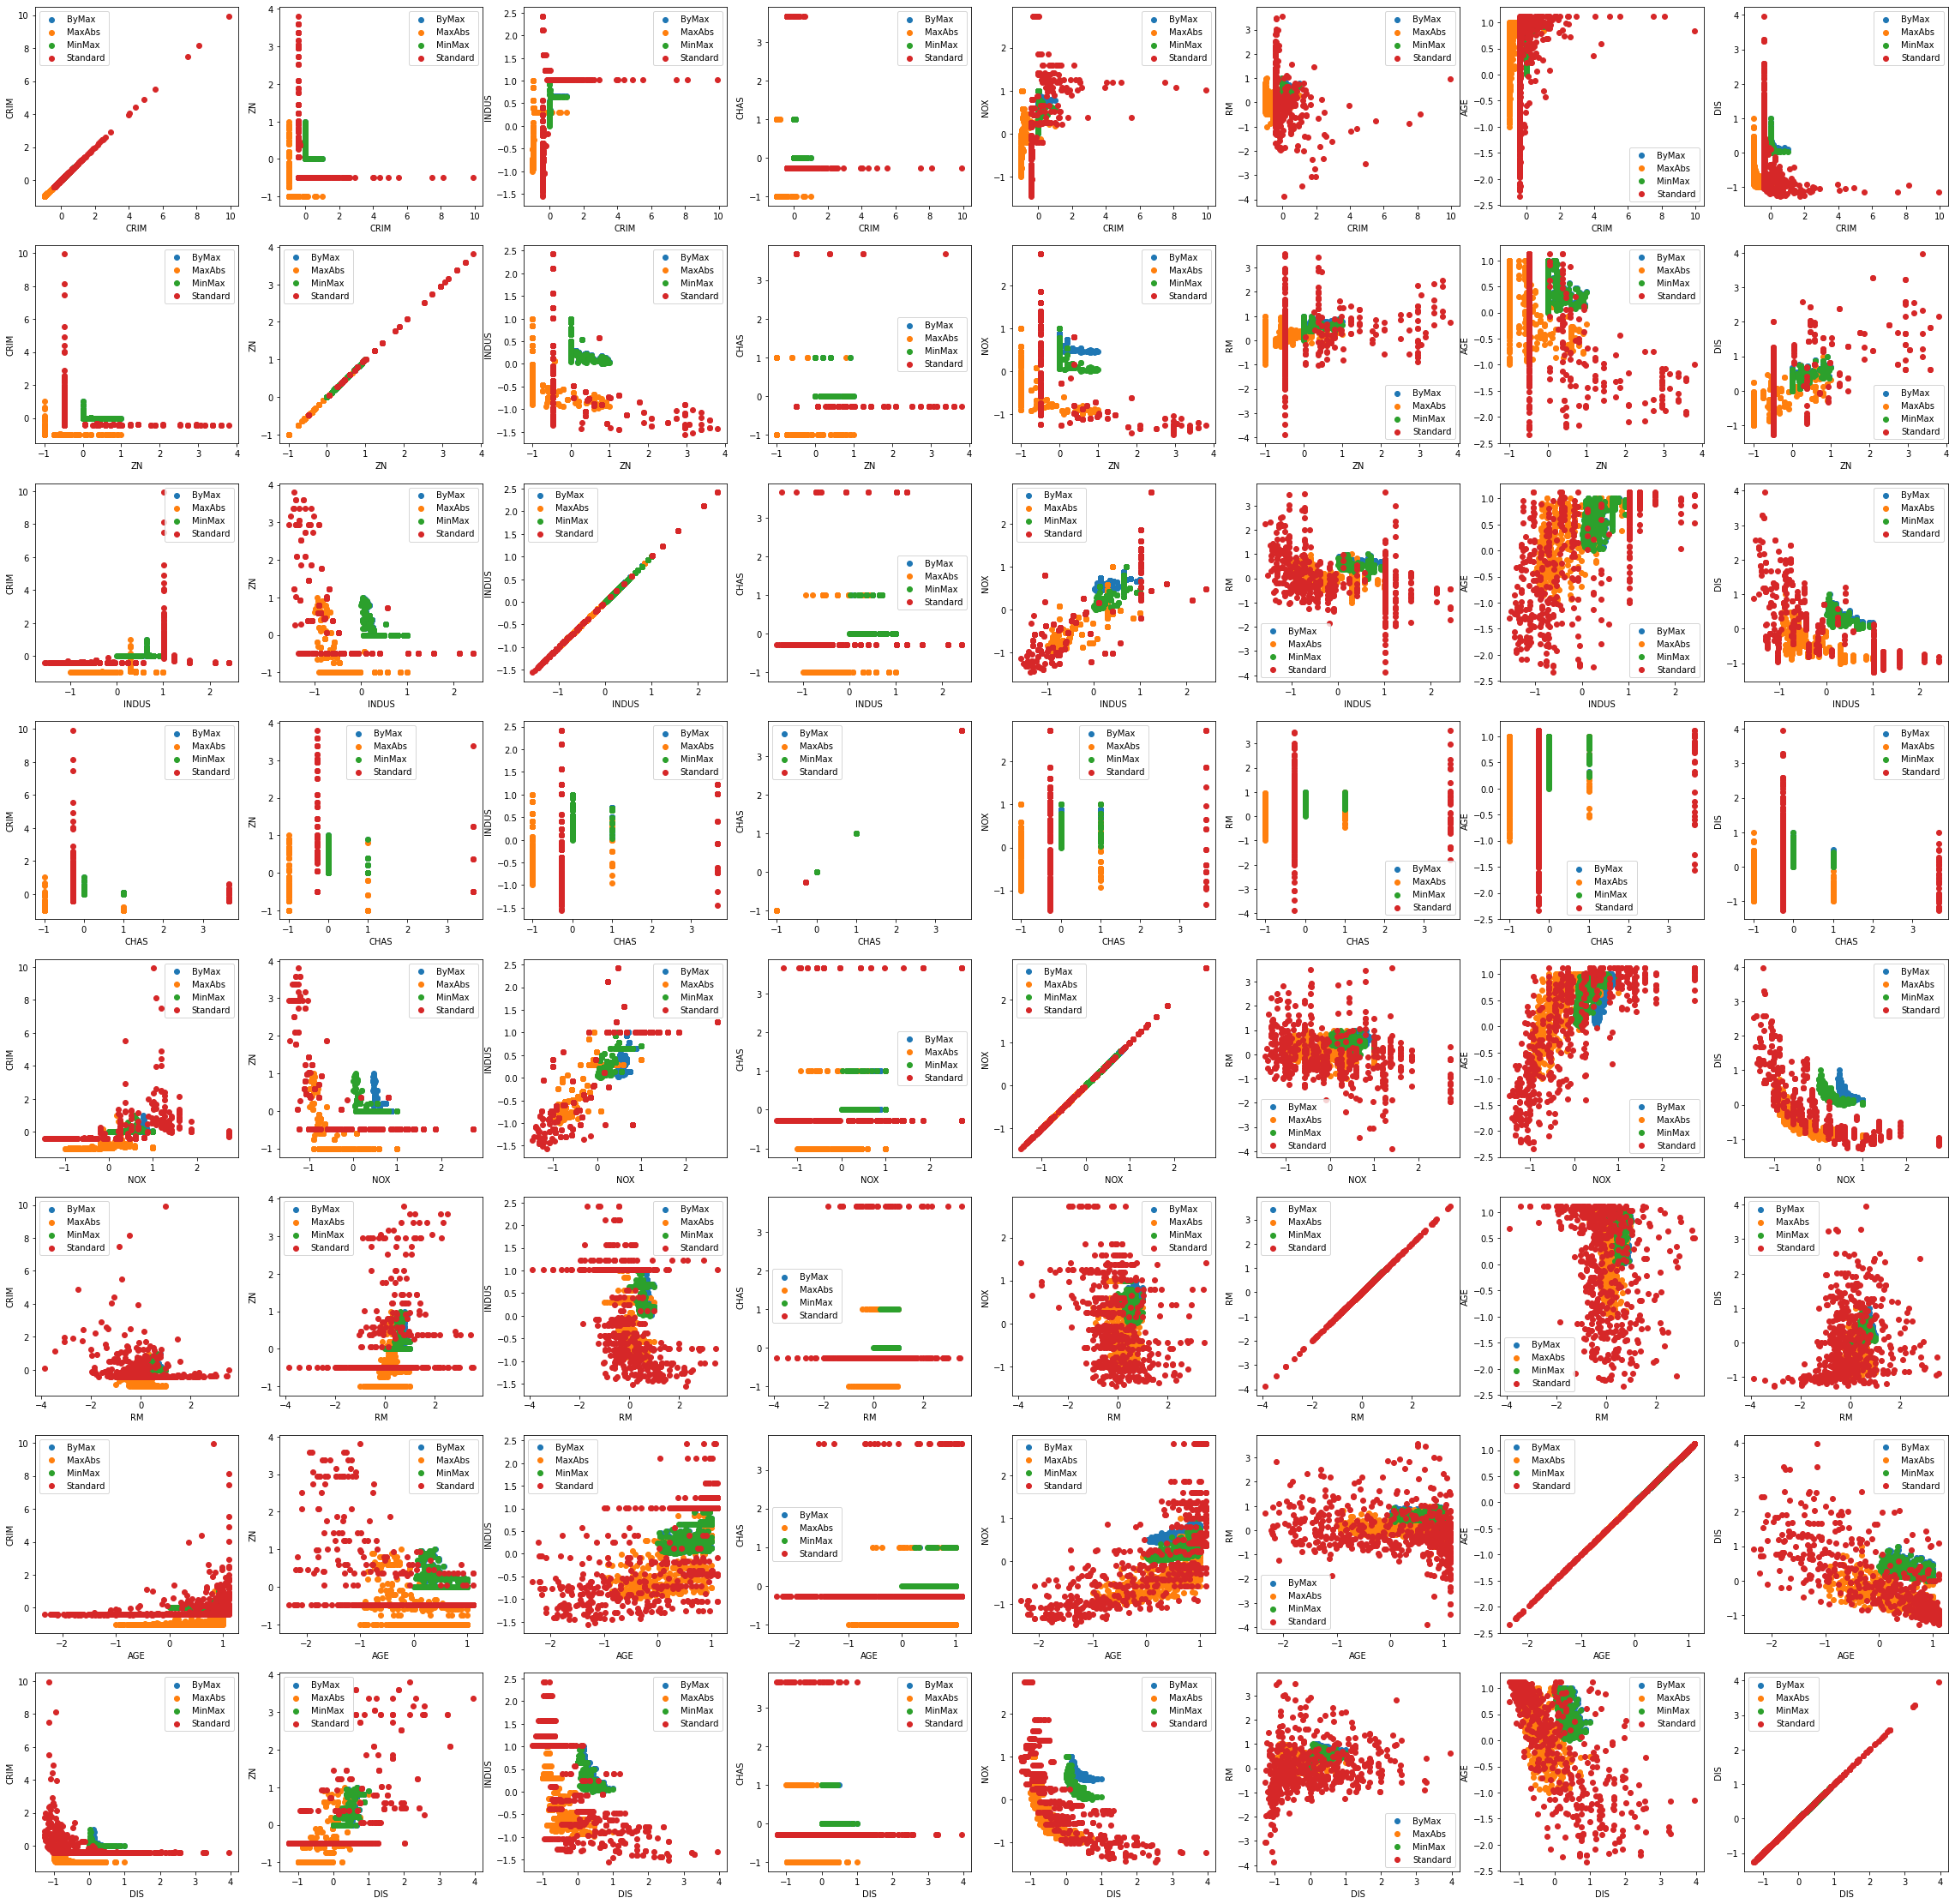

In [66]:
n = 8
fig, axs = plt.subplots(n, n, figsize=(40, 40))
for i in range(n):
    for j in range(n):
        axs[i, j].scatter(X_scaled[methods[0]].iloc[:, i], (X_scaled[methods[0]].iloc[:, j]), label=methods[0])
        axs[i, j].scatter(X_scaled[methods[1]].iloc[:, i], (X_scaled[methods[1]].iloc[:, j]), label=methods[1])
        axs[i, j].scatter(X_scaled[methods[2]].iloc[:, i], (X_scaled[methods[2]].iloc[:, j]), label=methods[2])
        axs[i, j].scatter(X_scaled[methods[3]].iloc[:, i], (X_scaled[methods[3]].iloc[:, j]), label=methods[3])
        axs[i, j].legend()
        axs[i, j].set_xlabel(df.columns[i], fontsize=10)
        axs[i, j].set_ylabel(df.columns[j], fontsize=10)